In [1]:
# 目的
# irisデータから、setosaを認識するように学習するための
# パーセプトロンを実装すること。
# 
# このサンプルを参考にしている。
# https://github.com/yamatsuka-hiroto/ml/blob/master/perceptron_iris.ipynb

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import itertools

# 1. 学習データの取得
iris = datasets.load_iris()

data = iris.data

# データサイズを表示
print('data size =', len(data))
# 試しに最初の5つを表示してみる。
print(data[:5])

data size = 150
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [2]:
# このデータ４種類には名前が付いている
# yamatsukaさんのサンプルでは、先頭２つ['sepal length (cm)', 'sepal width (cm)']
# だけ使用している。
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 目的はsetosaを見つけること
# 各データの結果（irisの種類）はtargetに入っている。
# これは0,1,2の３種類、がデータ数だけある。
targets = iris.target
print('target =', targets)
print('size =', len(targets))

# 0,1,2の名前はtarget_namesにある。
target_names=iris.target_names
print('target_names =', target_names)

target = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
size = 150
target_names = ['setosa' 'versicolor' 'virginica']


In [4]:
# targetsを名前に変換してlabelsに入れる
labels = target_names[targets]
print('labels =', labels)

labels = ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versi

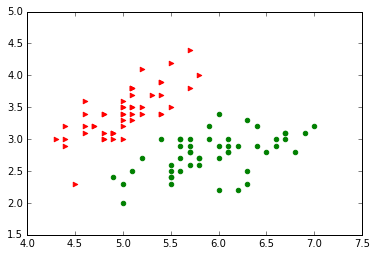

In [5]:
# 2. 学習データの確認
#
# これをグラフにしてみる。
# setosa, versicolorの２つのデータを表示する。
X_setosa     = data[labels == 'setosa'][:, 0:2]
X_versicolor = data[labels == 'versicolor'][:, 0:2]

# 学習データのグラフ表示
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], marker='>',color='red')
# versicolor
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 1],  marker='o', color='g')
plt.show()

In [6]:
# 学習データを使いやすいように加工する

# 学習データの入力X
# np.r_は行列に列方向で接続する
X = np.r_[X_setosa, X_versicolor]

# 学習データの結果Y
# setosaを探すのでsetosaに1を、そうでなければ0を入れておく。
Y = np.r_[np.ones(len(X_setosa)), np.zeros(len(X_versicolor))]

print('X[0〜4] = ', X[:5])
print('Y[0〜4] = ', Y[:5])

X[0〜4] =  [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]
Y[0〜4] =  [ 1.  1.  1.  1.  1.]


In [7]:
# ３.パーセプトロンクラスを定義する

class Perceptron:
    def __init__(self, w0, bias, rho):
        '''初期化
        w0 : 重み
        bias : バイアス
        rho  : 学習率ρ
        '''
        self.w = np.concatenate((w0, bias))  # 重みw0とbiasをくっつけて、１つのベクタにしておく
        self.rho = rho
        
    def loss_function(self, u):
        '''損失関数
        '''
        return 1 if u > 0 else 0
    
    def fx(self, x):
        '''f(x)を実行（ベクトルの演算　w * x）
        '''
        return self.w.dot(x)
    
    def train(self, X, Yt, loop_cnt):
        '''学習の実行
        X : 学習データ（入力）
        Y : 学習データ（期待値）
        loop_cnt : 学習回数の上限
        '''
        # Xに[1]をくっつける
        # biasの係数になる
        X_ = np.concatenate((X, np.ones(len(X))[:, np.newaxis]),axis=1)
        
        # 学習回数だけループ
        for num in range(loop_cnt):
            success = 0
            for x, y in zip(X_, Yt):
                # 入力xに期待値yで学習
                res = y - self.loss_function(self.fx(x))
                
                if res == 0:
                    # resが0（期待値と一致）なら成功
                    success += 1
                elif res > 0:
                    # 期待値の方が大きければ重みを増やす
                    self.w += x * self.rho
                elif res < 0:
                    # 期待値の方が大きければ重みを減らす
                    self.w -= x * self.rho
            if (num+1) % 10 == 0:
                print('{}, w=({}), bias={}'.format(num+1, self.w[:2], self.w[2]))
                
            if success == len(X):
                # すべて0ならば終了
                return num, (self.w[:2], self.w[2])
            
            num += 1

        # 失敗したら-1を返す
        return -1, (self.w[:2], self.w[2])

In [8]:
# ４. 学習の実行

# 重みの初期値
w = np.array([1., -1.,])
# バイアスの初期値
bias = np.array([3.,])
# 学習率を0.01
rate = 0.01

# パーセプトロンを生成
p0 = Perceptron(w, bias, rate)

# 学習回数
learn_cnt = 100

# 実行
(num, (w_, bias_)) = p0.train(X, Y, learn_cnt)
print('{}: w=({}), bias={}'.format(num, w_, bias_))

10, w=([-0.277 -0.817]), bias=2.8800000000000026
20, w=([-0.472 -0.348]), bias=2.8900000000000023
30, w=([-0.594 -0.087]), bias=2.8900000000000023
40, w=([-0.65   0.135]), bias=2.8800000000000026
50, w=([-0.713  0.272]), bias=2.860000000000003
60, w=([-0.765  0.391]), bias=2.8400000000000034
70, w=([-0.824  0.455]), bias=2.820000000000004
80, w=([-0.866  0.525]), bias=2.8000000000000043
82: w=([-0.848  0.557]), bias=2.8000000000000043


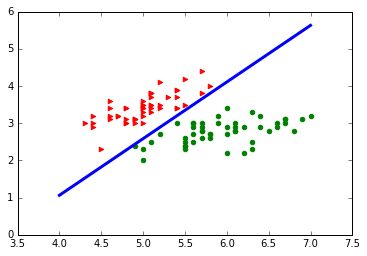

In [9]:
# ５. 学習結果のグラフ化

# 式の作成
a = - (w_[0] / w_[1])
b = - (bias_ / w_[1])
x = np.array(range(4, 8))
y = a * x + b


# 式の表示
plt.plot(x, y, color='blue', linewidth=3)
# setosaデータ
plt.scatter(X_setosa[:, 0], X_setosa[:, 1], marker='>',color='red')
# versicolorで０た
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 1],  marker='o', color='g')

# グラフ表示
plt.show()